In [1]:
# [RDKitでフィンガープリントを使った分子類似性の判定 | 化学の新しいカタチ](https://future-chem.com/rdkit-fingerprint/)

In [16]:
import pandas as pd
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import AllChem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Draw import SimilarityMaps

In [3]:
suppl = Chem.SDMolSupplier('./sdf/methyl-salicylate.sdf')
mols = [x for x in suppl if x is not None]
len(mols)

71

In [4]:
maccs_fps = [AllChem.GetMACCSKeysFingerprint(mol) for mol in mols]
maccs = DataStructs.BulkTanimotoSimilarity(maccs_fps[0], maccs_fps[1:])
maccsDice = DataStructs.BulkDiceSimilarity(maccs_fps[0], maccs_fps[1:])

In [5]:
rdkit_fps = [Chem.Fingerprints.FingerprintMols.FingerprintMol(mol) for mol in mols]
rdkit = DataStructs.BulkTanimotoSimilarity(rdkit_fps[0], rdkit_fps[1:])

In [6]:
rdkit[0:5]

[0.8361774744027304,
 0.8216704288939052,
 0.9503916449086162,
 0.3877094972067039,
 0.668]

In [7]:
morgan_fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048) for mol in mols]
morgan = DataStructs.BulkTanimotoSimilarity(morgan_fps[0], morgan_fps[1:])

In [8]:
morgan[0:5]

[0.6896551724137931,
 0.6176470588235294,
 0.6666666666666666,
 0.1076923076923077,
 0.6052631578947368]

In [9]:
avalon_fps = [pyAvalonTools.GetAvalonFP(mol) for mol in mols]
avalon = DataStructs.BulkTanimotoSimilarity(avalon_fps[0], avalon_fps[1:])

In [10]:
avalon[0:5]

[0.8163265306122449,
 0.9215686274509803,
 0.7962962962962963,
 0.2097560975609756,
 0.6142857142857143]

In [11]:
df = pd.DataFrame({'RDKit': rdkit,
                   'MACCS': maccs,
                   'Morgan': morgan,
                   'Avalon': avalon,
                  })
df.corr().round(2)

,RDKit,MACCS,Morgan,Avalon
RDKit,1.00,0.64,0.79,0.88
MACCS,0.64,1.00,0.68,0.79
Morgan,0.79,0.68,1.00,0.85
Avalon,0.88,0.79,0.85,1.00


In [12]:
morgan_default = AllChem.GetMorganFingerprint(mols[0], 2)
morgan_bitvect = AllChem.GetMorganFingerprintAsBitVect(mols[0], 2, 2048)
print(morgan_default.GetLength(), morgan_bitvect.GetNumBits())

4294967295 2048


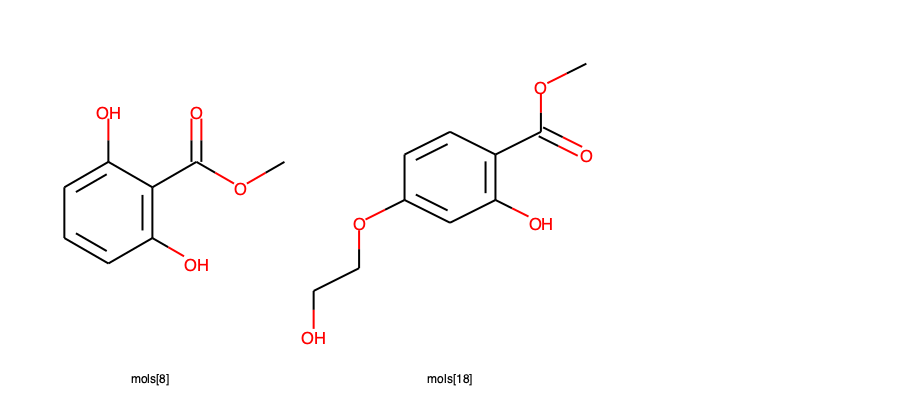

In [13]:
Draw.MolsToGridImage([mols[8], mols[18]], subImgSize=(300, 400), legends=['mols[8]', 'mols[18]'])


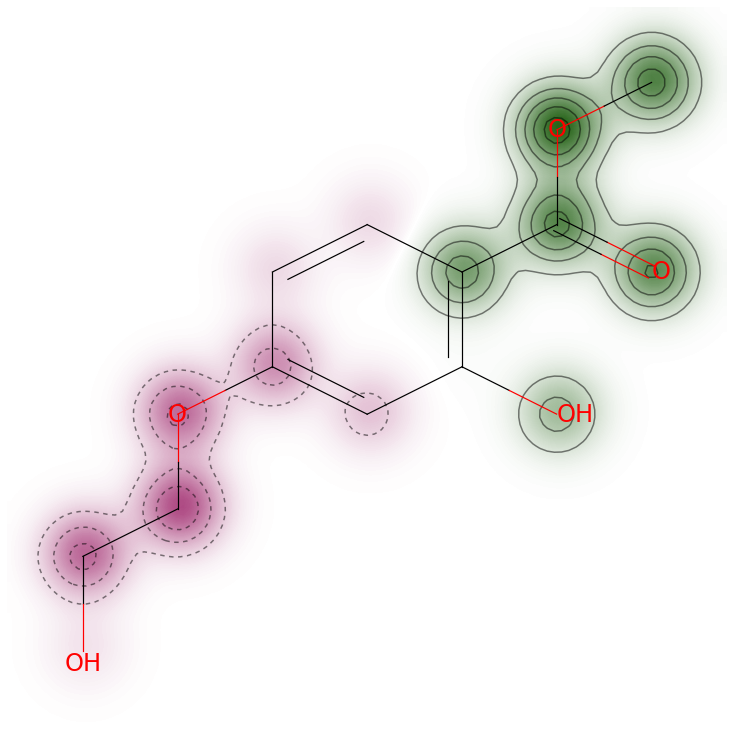

In [18]:
weight = SimilarityMaps.GetAtomicWeightsForFingerprint(mols[8], mols[18], SimilarityMaps.GetMorganFingerprint)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mols[18], weight, size=(400, 400))